## ACME: Numerical Differentiation

- problems 1, 2, 3, 5, 6

In [1]:
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import root

### Problem 1

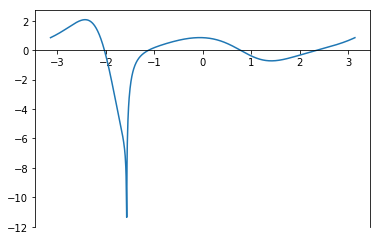

In [2]:
x = sy.symbols('x')
fx = (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
dfdx = sy.diff((sy.sin(x) + 1) ** sy.sin(sy.cos(x)), x)
dfdx

f_prime_x = sy.lambdify(x, dfdx, 'numpy')
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
xx = np.linspace(-np.pi, np.pi, num = 1000)
yy = f_prime_x(xx)
plt.plot(xx, yy)
plt.show()

### Problem 2

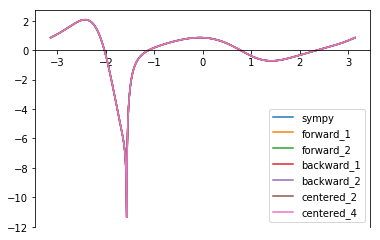

In [3]:
def forward_1(f, x, h):
    return (f(x + h) - f(x)) / h

def forward_2(f, x, h):
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)

def backward_1(f, x, h):
    return (f(x) - f(x - h)) / h

def backward_2(f, x, h):
    return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h)

def centered_2(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def centered_4(f, x, h):
    return (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)

h = 1e-6

f_prime_x = sy.lambdify(x, dfdx, 'numpy')
f = sy.lambdify(x, fx, 'numpy')
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
xx = np.linspace(-np.pi, np.pi, num = 1000)
yy1 = f_prime_x(xx)
yy2 = forward_1(f, xx, h)
yy3 = forward_2(f, xx, h)
yy4 = backward_1(f, xx, h)
yy5 = backward_2(f, xx, h)
yy6 = centered_2(f, xx, h)
yy7 = centered_4(f, xx, h)
plt.plot(xx, yy1, label = 'sympy')
plt.plot(xx, yy2, label = 'forward_1')
plt.plot(xx, yy3, label = 'forward_2')
plt.plot(xx, yy4, label = 'backward_1')
plt.plot(xx, yy5, label = 'backward_2')
plt.plot(xx, yy6, label = 'centered_2')
plt.plot(xx, yy7, label = 'centered_4')
plt.legend(loc='lower right')
plt.show()

#We change h, the difference between sympy and the rest may be significant.
#With h = 1e-6, the differnce is very different to tell (may be observed if zoom in a lot).

### Problem 3

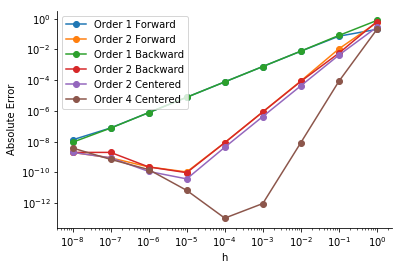

In [4]:
def approx_error(x0, h):
    '''h is an array of the approximation stepsize'''
    exact = f_prime_x(x0)
    f = sy.lambdify(x, fx, 'numpy')
    error_matrix = np.zeros((6, len(h)))
    error_matrix[0] = abs(forward_1(f, x0, h) - exact)
    error_matrix[1] = abs(forward_2(f, x0, h) - exact)
    error_matrix[2] = abs(backward_1(f, x0, h) - exact)
    error_matrix[3] = abs(backward_2(f, x0, h) - exact)
    error_matrix[4] = abs(centered_2(f, x0, h) - exact)
    error_matrix[5] = abs(centered_4(f, x0, h) - exact)
    return error_matrix
    
hh = np.logspace(-8, 0, 9)
x0  = 1
ax = plt.gca()
plt.loglog(hh, approx_error(x0, hh)[0], '-o', label = 'Order 1 Forward')
plt.loglog(hh, approx_error(x0, hh)[1], '-o', label = 'Order 2 Forward')
plt.loglog(hh, approx_error(x0, hh)[2], '-o', label = 'Order 1 Backward')
plt.loglog(hh, approx_error(x0, hh)[3], '-o', label = 'Order 2 Backward')
plt.loglog(hh, approx_error(x0, hh)[4], '-o', label = 'Order 2 Centered')
plt.loglog(hh, approx_error(x0, hh)[5], '-o', label = 'Order 4 Centered')
plt.legend(loc = 'upper left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('h')
ax.set_ylabel('Absolute Error')
plt.show()

### Problem 4

In [5]:
def Jacobian(f, x0, h):
    '''f: an array of functons
    x0: an array of floats
    h: the approximation stepsize, float'''
    I = np.eye(len(x0)) # then e_j = I[j]
    JT = np.zeros((len(x0), len(f(x0))))
    for i in range(len(x0)):
        JT[i] = (f(x0 + h*I[i]) - f(x0 - h*I[i])) / (2*h)
    return JT.T

f = lambda x: np.array([x[0]**2, x[0]**3 - x[1]])
x0 = [1,1,1]
h = 1e-6
print(Jacobian(f, x0, h))

[[ 2.  0.  0.]
 [ 3. -1.  0.]]


### Problem 5

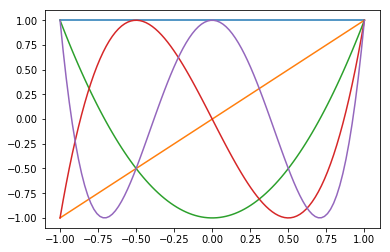

F:\Anaconda\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


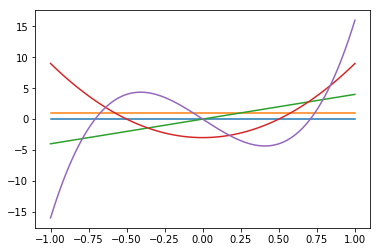

In [6]:
from autograd import numpy as anp
from autograd import elementwise_grad

def chebyshev_poly(x, n):
    '''
    x: an array of nodes
    n: integer, represents the order of the chebyshev polynomial'''
    if n == 0:
        return anp.ones_like(x)
    if n == 1:
        return x
    else:
        T = 2 * x * chebyshev_poly(x, n - 1) - chebyshev_poly(x, n - 2)
    return T

xx = anp.linspace(-1, 1, 100)
for i in range(4+1):
    plt.plot(xx, chebyshev_poly(xx, i))
plt.show()

def chebyshev_derivative(x, n):
    derivative = elementwise_grad(chebyshev_poly)
    return derivative(x, n)
# chebyshev_poly are not functions but an array of values?

for i in range(4+1):
    plt.plot(xx, chebyshev_derivative(xx, i))
plt.show()

## Newton's Method
- problem 1, 3, 4, 7

### Problem 1

In [7]:
def Newton(f, x0, f_prime, tol = 1e-5, max_iter = 15):
    i = 0
    x = x0
    converge = False
    while i < max_iter:
        next_x = x - f(x) / f_prime(x)
        if abs(next_x - x) < tol:
            converge = True
            break
        i += 1
        x = next_x
    return next_x, converge

f  = lambda x: np.exp(x) - 2
f_prime = lambda x: np.exp(x)

g = lambda x: x**4 - 3
g_prime = lambda x: 4*x**3

print(Newton(f, 0, f_prime))
print(Newton(g, 1, g_prime))

(0.6931471805600254, True)
(1.3160740129543826, True)


### Problem 3

In [8]:
def Newton_backtracking(f, x0, f_prime, tol = 1e-5, max_iter = 15, α = 1):
    i = 0
    x = x0
    converge = False
    while i < max_iter:
        next_x = x - α * f(x) / f_prime(x)
        if abs(next_x - x) < tol:
            converge = True
            break
        i += 1
        x = next_x
    return next_x, converge, i # keep track of number of iterations to use in the next problem.

f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f_prime = lambda x: 1/3 * np.power(np.abs(x), -2./3)

print(Newton_backtracking(f, 0.1, f_prime))
print(Newton_backtracking(f, 0.1, f_prime, α = 0.4))

(-3276.7999999999897, False, 15)
(-1.280000000000025e-06, True, 6)


### Problem 4

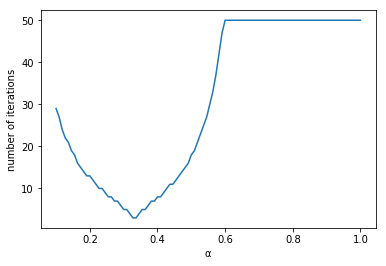

In [9]:
def effect_of_α(f, x0, f_prime, N, tol = 1e-5, max_iter = 15):
    '''generate N α within the range of 0 to 1'''
    αs = np.linspace(1e-1, 1, N) # if alpha is set too near to 0, then the Newton shows convergence in 0 iteration, 
                                 # but it is not a true convergence to the answer, 
                                 # only because we are substracting a too small number from the current x.
    iterations = []
    for i in αs:
        iteration = Newton_backtracking(f, x0, f_prime, tol = tol, max_iter = max_iter, α = i)[2]
        iterations.append(iteration)
    return αs, iterations

f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f_prime = lambda x: 1/3 * np.power(np.abs(x), -2./3)
result = effect_of_α(f, 1, f_prime, 100, tol = 1e-5, max_iter = 50)

plt.plot(result[0],result[1])
plt.xlabel('α')
plt.ylabel('number of iterations')
plt.show()

### Problem 7

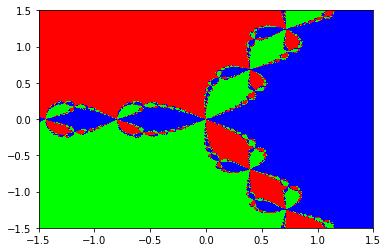

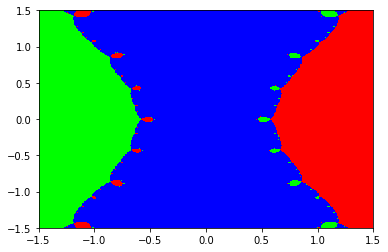

In [10]:
def basins_of_attraction(f, f_prime, zeros, bounds, res, iters):
    zeros = np.array(zeros)
    rmin, rmax, imin, imax = bounds
    rr = np.linspace(rmin, rmax, res)
    ii = np.linspace(imin, imax, res)
    R, I = np.meshgrid(rr, ii)
    X0 = R + I * 1j
    X = X0
    
    for i in range(iters):
        nextX = X - f(X) / f_prime(X)
        X = nextX   
    Y = np.zeros_like(X, dtype = 'int64')
    
    for i in range(res):
        for j in range(res):
            Y[i][j] = np.argmin(abs(zeros - X[i][j]))
            
    plt.pcolormesh(R, I, Y, cmap = 'brg')
    plt.show()

f = lambda x: x**3 - 1
f_prime = lambda x: 3*x**2
f_zeros = [1, -0.5 + 1j * np.sqrt(3) / 2, -0.5 - 1j * np.sqrt(3) / 2]
g = lambda x: x**3 - x
g_prime = lambda x: 3*x**2 - 1
g_zeros = [0, 1, -1]

bounds = (-1.5, 1.5, -1.5, 1.5)
res = 500
iters = 20

basins_of_attraction(f, f_prime, f_zeros, bounds, res, iters)
basins_of_attraction(g, g_prime, g_zeros, bounds, res, iters)

## Numberical integration
- exercises 2.1, 2.2, 2.3, 2.4, 3.1, 3.2, 4.1

### Exercise 2.1

In [11]:
def numerical_integral(f, a, b, N, method = {'midpoint', 'trapezoid', 'Simpsons'}):
    if method == 'midpoint':
        x = np.zeros(N)
        sums = 0
        for i in range(len(x)):
            x[i] = a + (2*i + 1) * (b - a) / (2 * N)
            sums += g(x[i])
        integral = (b - a) * sums / (N)
    if method == 'trapezoid':
        x = np.zeros(N+1)
        sums = 0
        for i in range(len(x)):
            x[i] = a + i * (b - a) / N
            sums += 2 * g(x[i])
        sums = sums - (g(x[0]) + g(x[N]))
        integral = (b - a) * sums / (2 * N)
    if method == 'Simpsons':
        x = np.zeros(2*N + 1)
        for i in range(len(x)):
            x[i] = a + i * (b - a) / (2*N)
        sums = g(x[0]) + g(x[2*N])
        integral = (b - a) * sums / (2 * N)
        for i in range(1, 2*N - 1, 2):
            sums += 4 * g(x[i])
        for i in range(2, 2*N - 2, 2):
            sums += 2 * g(x[i])
        integral = (b - a) * sums / (6 * N )
    return integral

g = lambda x: 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1
exact = 4373.33

print(abs(numerical_integral(g, -10, 10, 10000, 'midpoint') - exact))
print(abs(numerical_integral(g, -10, 10, 10000, 'trapezoid') - exact))
print(abs(numerical_integral(g, -10, 10, 10000, 'Simpsons') - exact))

# Simpsons seems to produce a worse result

0.00319646663228923
0.003607066683798621
0.8552335379026772


### Exercise 2.2

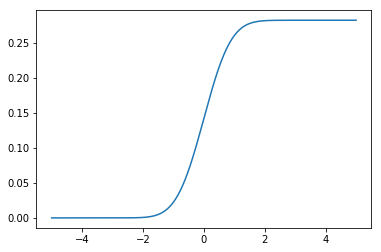

In [12]:
import numpy as np
from scipy.stats import norm
from scipy import integrate
import matplotlib.pyplot as plt

def Newton_Cotes_normal(μ, σ, N, k):
    '''
    μ: mean of the normal distribution
    σ: SD of the normal distribution
    N: number of equally spaced nodes N
    k: number of SD away from μ to make the furthest nodes
    '''
    Z = np.linspace(μ - k * σ, μ + k * σ, N)
    w = np.zeros_like(Z)
    for i in range(N):
        if i == 0:
            w[i] = norm.cdf((Z[i] + Z[i+1]) / 2, loc = μ, scale = σ)
        elif i == N - 1:
            w[i] =1 - norm.cdf((Z[i-1] + Z[i]) / 2, loc = μ, scale = σ)
        else:
            Z_min = (Z[i-1] + Z[i]) / 2
            Z_max = (Z[i] + Z[i+1]) / 2
#             f = lambda x: np.exp(-(x-μ)**2 / 2*σ**2) / np.sqrt(2*np.pi*σ**2)
#             w[i] = integrate.quad(f, Z_min, Z_max)[0]
            w[i] = norm.cdf(Z_max, loc = μ, scale = σ) - norm.cdf(Z_min, loc = μ, scale = σ)
    return Z, w

# check:
N = 1000
nodes = Newton_Cotes_normal(0, 1, 1000, 5)[0]
weights = Newton_Cotes_normal(0, 1, 1000, 5)[1]
def approx_cdf(N):
    sums = []
    sum_till_N = 0
    for i in range(N):
        sum_till_N += weights[i] * norm.pdf(nodes[i])
        sums.append(sum_till_N)
    return sums

plt.plot(Newton_Cotes_normal(0, 1, 1000, 5)[0], approx_cdf(N))
plt.show()

### Exercise 2.3

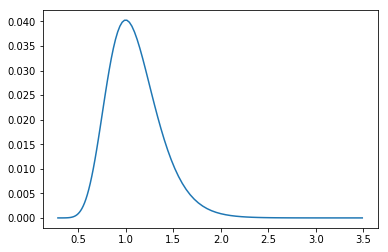

In [13]:
def lognormal_approx(μ, σ, N, k):
    nodes = np.exp(Newton_Cotes_normal(μ, σ, N, k)[0])
    weights = Newton_Cotes_normal(μ, σ, N, k)[1]
    return nodes, weights

# check:
plt.plot(lognormal_approx(0, 0.25, 100, 5)[0], lognormal_approx(0, 1, 100, 5)[1])
plt.show()

### Exercise 2.4

In [14]:
N = 1000
k = 5

μ = 10.5
σ = 0.8
nodes, weights = lognormal_approx(μ, σ, N, k)
approx_expec = np.sum([weights[i] * nodes[i] for i in range(N)])
approx_expec
exact_expec = np.exp(μ + σ**2 / 2)
difference = np.abs(approx_expec - exact_expec)
difference

# the approxmation is pretty good if I use 1000 nodes with +- 5 SDs.

0.034588674556289334

### Exercise 3.2

In [15]:
from scipy.integrate import quad

g = lambda x: 0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1
quad(g, -10, 10) 
abs(quad(g, -10, 10)[0] - 4373.33) # good approximation

0.0033333333340124227

### Exercise 4.1

In [16]:
import numpy as np
import scipy.stats as sts

# Approximate integral int_0^1 x dx by Monte Carlo integration
np.random.seed(seed=25)

# N = 1
N_1 = 1
mc_draws_1 = sts.uniform.rvs(size=N_1)
print(mc_draws_1)
approx_int_1 = (1 / N_1) * mc_draws_1
print('MC approx integral, N=1', approx_int_1)

# N = 20
N_20 = 20
mc_draws_20 = sts.uniform.rvs(size=N_20)
# print(mc_draws_20)
approx_int_20 = (1 / N_20) * mc_draws_20.sum()
print('MC approx integral, N=20', approx_int_20)

[0.87012414]
MC approx integral, N=1 [0.87012414]
MC approx integral, N=20 0.4280663938022793
